In [151]:
import numpy as np

def train_linear_regression_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    """
    Train a linear regression model using gradient descent.

    Parameters:
        X (numpy.ndarray): Input features (shape: (n_samples, n_features)).
        y (numpy.ndarray): Target values (shape: (n_samples,)).
        learning_rate (float): Learning rate for gradient descent.
        epochs (int): Number of iterations for gradient descent.

    Returns:
        weights (numpy.ndarray): Learned weights (shape: (n_features + 1,)).
    """
    # Add a column of ones to X for the bias term
    X = np.c_[np.ones(X.shape[0]), X] #without this term no fitting is secured

    # Initialize weights randomly or with zeros
    weights = np.zeros(X.shape[1])
 
    # Gradient descent loop
    for _ in range(epochs):
        # Predictions
        y_pred = X.dot(weights)
        # Compute gradients
        gradients = -2 * X.T.dot(y - y_pred) / X.shape[0]
        # Update weights
        weights -= learning_rate * gradients
    
    return weights

In [153]:
def predict_linear_regression(X, weights):
    """
    Make predictions using a trained linear regression model.

    Parameters:
        X (numpy.ndarray): Input features (shape: (n_samples, n_features)).
        weights (numpy.ndarray): Learned weights (shape: (n_features + 1,)).

    Returns:
        y_pred (numpy.ndarray): Predicted values (shape: (n_samples,)).
    """
    # Add a column of ones to X for the bias term
    X = np.c_[np.ones(X.shape[0]), X]
    
    # Compute predictions
    y_pred = X.dot(weights)
    
    return y_pred

In [155]:
def train_linear_regression_least_squares(X, y):
    """
    Train a linear regression model using the least squares method.

    Parameters:
        X (numpy.ndarray): Input features (shape: (n_samples, n_features)).
        y (numpy.ndarray): Target values (shape: (n_samples,)).

    Returns:
        weights (numpy.ndarray): Learned weights (shape: (n_features + 1,)).
    """
    # Add a column of ones to X for the bias term
    X = np.c_[np.ones(X.shape[0]), X]
    
    # Solve the normal equation: (X^T X) w = X^T y
    weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    
    return weights

In [157]:
# Generate synthetic data
np.random.seed(42)

# True parameters for synthetic data
true_weights = np.array([3, 1.5])  # Bias term and slope
X = 2 * np.random.rand(100, 1)  # Random feature values between 0 and 2
y = true_weights[0] + true_weights[1] * X + np.random.randn(100, 1) * 0.5  # Add noise
# Flatten y to make it compatible with the functions
y = y.flatten()


In [159]:
# Train using gradient descent
weights_gd = train_linear_regression_gradient_descent(X, y, learning_rate=0.01, epochs=1000)

# Train using least squares
weights_ls = train_linear_regression_least_squares(X, y)

In [161]:
# Generate test points for plotting
X_test = np.linspace(0, 2, 100).reshape(-1, 1)
# Predictions using gradient descent
y_pred_gd = predict_linear_regression(X_test, weights_gd)

# Predictions using least squares
y_pred_ls = predict_linear_regression(X_test, weights_ls)

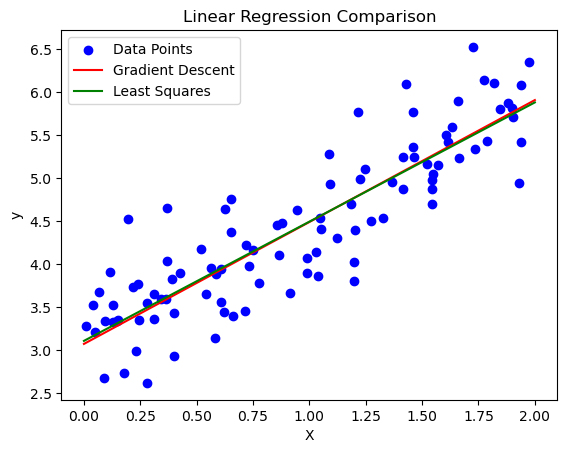

In [163]:
import matplotlib.pyplot as plt

# Scatter plot of the data
plt.scatter(X, y, color='blue', label='Data Points')

# Line of best fit using gradient descent
plt.plot(X_test, y_pred_gd, color='red', label='Gradient Descent')

# Line of best fit using least squares
plt.plot(X_test, y_pred_ls, color='green', label='Least Squares')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Comparison')
plt.legend()
plt.savefig("Gradient VS LS.png")  
# Show the plot
plt.show()

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

def train_linear_regression_sklearn(X, y, learning_rate=0.01, epochs=1000):
    """
    Train a linear regression model using scikit-learn's SGDRegressor.

    Parameters:
        X (numpy.ndarray): Input features (shape: (n_samples, n_features)).
        y (numpy.ndarray): Target values (shape: (n_samples,)).
        learning_rate (float): Learning rate for gradient descent.
        epochs (int): Number of iterations for gradient descent.

    Returns:
        model (SGDRegressor): Trained scikit-learn model.
    """
    # Scale the features for better convergence
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Initialize the SGDRegressor
    model = SGDRegressor(learning_rate='constant', eta0=learning_rate, max_iter=epochs, tol=None)
    
    # Fit the model
    model.fit(X_scaled, y)
    
    return model, scaler

In [ ]:
def predict_linear_regression_sklearn(model, scaler, X):
    """
    Make predictions using a trained scikit-learn linear regression model.

    Parameters:
        model (SGDRegressor): Trained scikit-learn model.
        scaler (StandardScaler): Feature scaler used during training.
        X (numpy.ndarray): Input features (shape: (n_samples, n_features)).

    Returns:
        y_pred (numpy.ndarray): Predicted values (shape: (n_samples,)).
    """
    # Scale the input features
    X_scaled = scaler.transform(X)
    
    # Predict using the model
    y_pred = model.predict(X_scaled)
    
    return y_pred

In [ ]:
from sklearn.linear_model import LinearRegression

# Train using scikit-learn's SGDRegressor
model_sgd, scaler_sgd = train_linear_regression_sklearn(X, y, learning_rate=0.01, epochs=10)

# Train using least squares method
weights_ls = train_linear_regression_least_squares(X, y)

In [75]:
# Generate test points for plotting
X_test = np.linspace(0, 2, 100).reshape(-1, 1)

# Predictions using scikit-learn's SGDRegressor
y_pred_sgd = predict_linear_regression_sklearn(model_sgd, scaler_sgd, X_test)

# Predictions using least squares
y_pred_ls = predict_linear_regression(X_test, weights_ls)

NameError: name 'y_pred_sgd' is not defined

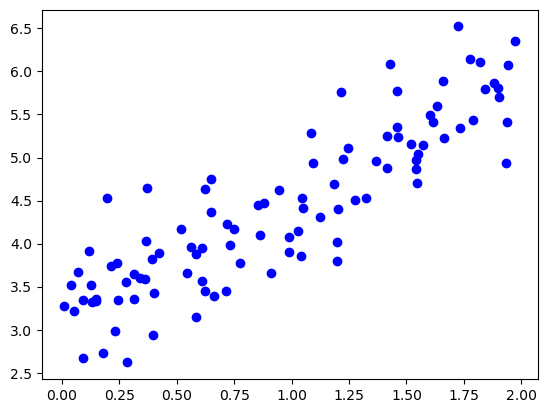

In [149]:
plt.scatter(X, y, color='blue', label='Data Points')

# Line of best fit using scikit-learn's SGDRegressor
plt.plot(X_test, y_pred_sgd, color='red', label='Scikit-Learn SGD')

# Line of best fit using least squares
plt.plot(X_test, y_pred_ls, color='green', label='Least Squares')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Comparison')
plt.legend()
plt.savefig("SGD VS LS.png") 
# Show the plot
plt.show()

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Single output neuron
    
    def forward(self, x):
        return self.linear(x)

def train_linear_regression_pytorch(X, y, learning_rate=0.01, epochs=1000):
    """
    Train a linear regression model using PyTorch.

    Parameters:
        X (numpy.ndarray): Input features (shape: (n_samples, n_features)).
        y (numpy.ndarray): Target values (shape: (n_samples,)).
        learning_rate (float): Learning rate for gradient descent.
        epochs (int): Number of iterations for gradient descent.

    Returns:
        model (SimpleNN): Trained PyTorch model.
    """
    # Convert data to PyTorch tensors
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
    
    # Initialize the model, loss function, and optimizer
    model = SimpleNN(input_dim=X.shape[1])
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    
    # Training loop
    for epoch in range(epochs):
        # Forward pass
        y_pred = model(X_tensor)
        
        # Compute loss
        loss = criterion(y_pred, y_tensor)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    return model

In [27]:
def predict_linear_regression_pytorch(model, X):
    """
    Make predictions using a trained PyTorch linear regression model.

    Parameters:
        model (SimpleNN): Trained PyTorch model.
        X (numpy.ndarray): Input features (shape: (n_samples, n_features)).

    Returns:
        y_pred (numpy.ndarray): Predicted values (shape: (n_samples,)).
    """
    # Convert data to PyTorch tensor
    X_tensor = torch.tensor(X, dtype=torch.float32)
    
    # Predict using the model
    with torch.no_grad():
        y_pred = model(X_tensor).numpy()
    
    return y_pred

In [29]:
# Train using PyTorch
model_nn = train_linear_regression_pytorch(X, y, learning_rate=0.01, epochs=1000)

# Train using least squares method
weights_ls = train_linear_regression_least_squares(X, y)

In [31]:
# Generate test points for plotting
X_test = np.linspace(0, 2, 100).reshape(-1, 1)

# Predictions using PyTorch
y_pred_nn = predict_linear_regression_pytorch(model_nn, X_test)

# Predictions using least squares
y_pred_ls = predict_linear_regression(X_test, weights_ls)

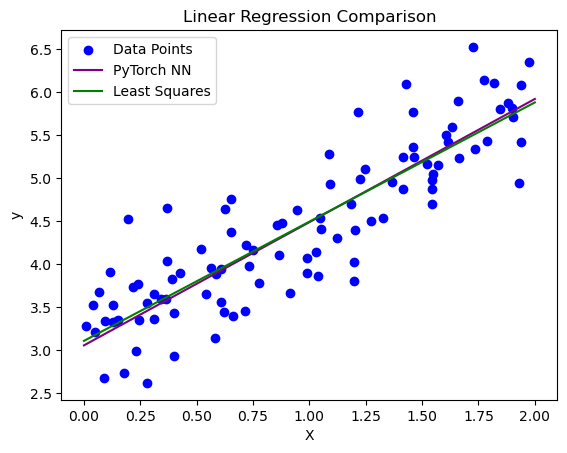

In [33]:
plt.scatter(X, y, color='blue', label='Data Points')

# Line of best fit using PyTorch
plt.plot(X_test, y_pred_nn, color='purple', label='PyTorch NN')

# Line of best fit using least squares
plt.plot(X_test, y_pred_ls, color='green', label='Least Squares')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Comparison')
plt.legend()

# Show the plot
plt.show()